<a href="https://colab.research.google.com/github/christakahashi/ECE447/blob/master/lectures/Pole_assignement_in_the_S_domain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[link text](https://)EE447: Pole assignement in the S-domain
 
Authored by Dr. Chris Takahashi© 2020, University of Washington

In [2]:
!pip install control

import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sympy import *
from matplotlib import animation
from control import *

%matplotlib inline
#comment out for light mode
plt.style.use('dark_background')

try: 
  import google.colab #test for colab
  import IPython
  def setup_typeset():
    """MathJax initialization for the current cell.
    
    This installs and configures MathJax for the current output.
    """
    IPython.display.display(IPython.display.HTML('''
        <script src="https://www.gstatic.com/external_hosted/mathjax/latest/MathJax.js?config=TeX-AMS_HTML-full,Safe&delayStartupUntil=configured"></script>
        <script>
          (() => {
            const mathjax = window.MathJax;
            mathjax.Hub.Config({
            'tex2jax': {
              'inlineMath': [['$', '$'], ['\\(', '\\)']],
              'displayMath': [['$$', '$$'], ['\\[', '\\]']],
              'processEscapes': true,
              'processEnvironments': true,
              'skipTags': ['script', 'noscript', 'style', 'textarea', 'code'],
              'displayAlign': 'center',
            },
            'HTML-CSS': {
              'styles': {'.MathJax_Display': {'margin': 0}},
              'linebreaks': {'automatic': true},
              // Disable to prevent OTF font loading, which aren't part of our
              // distribution.
              'imageFont': null,
            },
            'messageStyle': 'none'
          });
          mathjax.Hub.Configured();
        })();
        </script>
        '''))
  def custom_latex_printer(exp,**options):
      setup_typeset()
      return printing.latex(exp,**options)
  init_printing(use_latex="mathjax",latex_printer=custom_latex_printer)
except:
  init_printing(use_latex='mathjax')

Consider the standard feedback configuration
![alt text](https://raw.githubusercontent.com/christakahashi/ECE447/master/images/standard_FB.png)

with a strictly proper transfer function for the plant
$$G_p(s)=\frac{b_{n-1}s^{n-1}+b_{n-2}s^{n-2}+\cdots+b_1s^1+b_0}{s^n+a_{n-1}s^{n-1}+a_{n-2}s^{n-2}+\cdots+a_1s^1+a_0}$$ 

 and a proper transferfunction for the controller
$$
G_c(s)=\frac{d_rs^r + d_{r-1}s^{r-1}+d_{r-2}s^{r-2}+\cdots+d_1s^1+d_0}{s^r+c_{r-1}s^{r-1}+c_{r-2}s^{r-2}+\cdots+c_1s^1+c_0}
$$
 with $r=n-1$.


We can assign $n+r = 2n-1$ poles $\left\{ p^*_1,p^*_2,\dots, p^*_{2n-1} \right\}$ to the closed loop system $T(s)$.  

To see this consider $G_c(s)=N_c/D_c$ and $G_p(s)=N_p/D_p$ so,

$$T(s)=\frac{G_c(s)G_p(s)}{1+G_c(s)G_p(s)} = \frac{N_p(s)N_c(s)}{N_p(s)N_c(s)+D_p(s)D_c(s)}$$

so $T(s)$ has the characteristic polynomial $N_p(s)N_c(s)+D_p(s)D_c(s)$, which is an $2n-1$ degree and has can be set arbitrarilly by solving 

$$N_p(s)N_c(s)+D_p(s)D_c(s) = (s-p^*_1)(s-p^*_2)\cdots(s-p^*_{2n-1})
$$

 for $\{d_r,d_{r-1},\dots,d_0,c_{r-1},c_{r-2},\dots,c_0\}$.












###Example
Consider the plant
$$G_p(s) = \frac{s-1}{s(s-4)}$$
and place poles at $-1,-2,-3$.  

so $n=2$ and $r:=n-1=1$.

$$G_c(s) = \frac{d_1s+d_0}{s-c_0}$$

$T(s)$ is:

In [0]:
var("s d0 d1 c0")

Gp = (s-1)/(s*(s-4))
Gc = (d1*s+d0)/(s+c0)

T =  (Gp*Gc/(1+Gp*Gc)).expand().simplify()
T = collect(T,s)

with characteristic polynomial

In [75]:
n,d = fraction(T)
d

       3    2                                    
-d₀ + s  + s ⋅(c₀ + d₁ - 4) + s⋅(-4⋅c₀ + d₀ - d₁)

In [77]:
latex(((s+1)*(s+2)*(s+3)).expand())

's^{3} + 6 s^{2} + 11 s + 6'

Solving
\begin{align}
s^{3} + s^{2} \left( c_{0} + d_{1} - 4\right) + s \left(-4 c_{0} + d_{0} - d_{1}\right)- d_{0} &= (s+1)(s+2)(s+3) \\
&= s^{3} + 6 s^{2} + 11 s + 6
\end{align}
gives us

In [78]:
charpoly = (s+1)*(s+2)*(s+3)
soln = solve(d-charpoly,[c0,d0,d1])
soln

{c₀: -9, d₀: -6, d₁: 19}

which gives us the controller:
$$Gc(s) = \frac{19 s - 6}{s - 9} $$

In [79]:
Gc.subs(soln)

19⋅s - 6
────────
 s - 9  

Check solution:

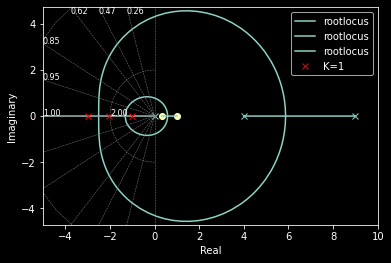

In [109]:
Gp = tf([1,-1],[1,-4,0])
Gc = tf([19,-6],[1,-9])
roots,K = root_locus(Gp*Gc,xlim=(-5,10));
ind = np.where(K>0.9995)[0][0] 
K[ind]
polesK1 = plt.plot(np.real(roots[ind]), np.imag(roots[ind]),'xr',label="K=1")
plt.legend( )

0.9997654262641237

0.9993233818905446